We will be doing a simple exploratory data analysis(EDA)of the Olympic games dataset.
 It is an historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

First, we need to import all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Next, We must import the datasets

In [2]:


data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')



We need to make sense of the data, let's view the first 5 rows

In [3]:
data.head(5)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

We need to use  describe and info functions to collect statistical information, datatypes, column names and other information.

In [4]:
data.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In this case, the Dataset has 15 different columns, and a whole 271116 rows! That’s over 270k athletes! 

In [6]:
regions.head(5)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

We can see that the notes column has NaN values. This must be taken into account.
Let us now join the dataframes using merge function.

In [7]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [8]:
merged.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

Let's start creating a new dataframe including only gold medalists.

In [9]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   region notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN

Before we make a plot, we need to check if Age contains NaN values

In [10]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

So it does have NaN values, Let's clean this up.

In [11]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

Now let's expore the first visualisation.
We can now create a countplot to see the result of our work:


Text(0.5, 1.0, 'Distribution of Gold Medals')

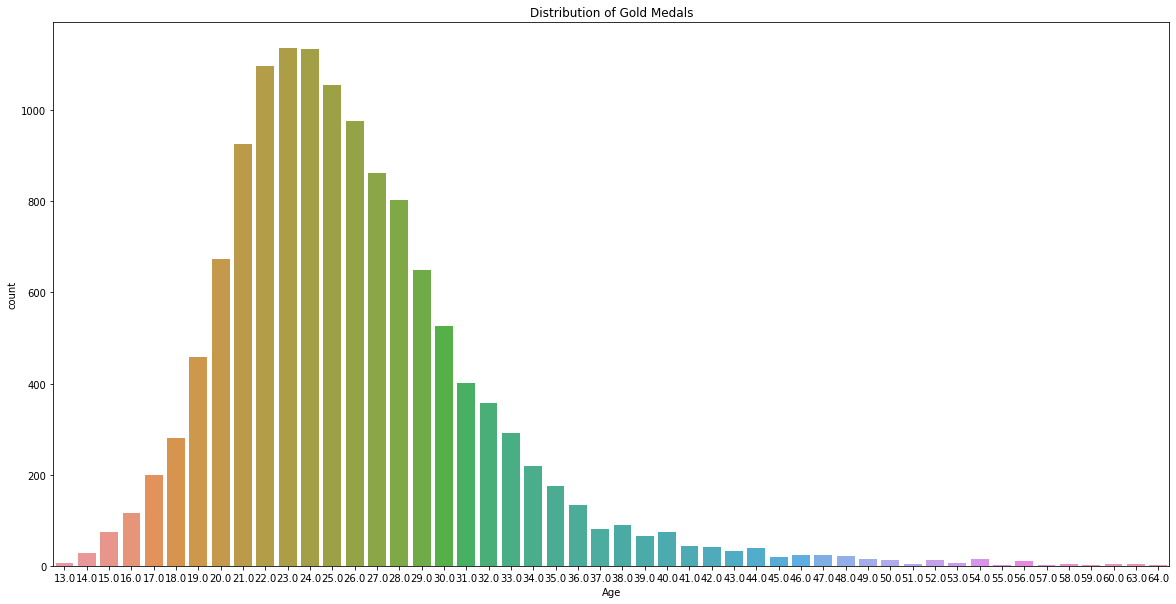

In [12]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

There's something amazing here, People over age of 50 have won gold medals! Let's find out more.

In [13]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

So, 65 people over age 50 have won gold medals
But what sport disciplines could these be?
let's create a new dataframe called MasterDisciplines to visualise this

In [14]:


masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]



Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

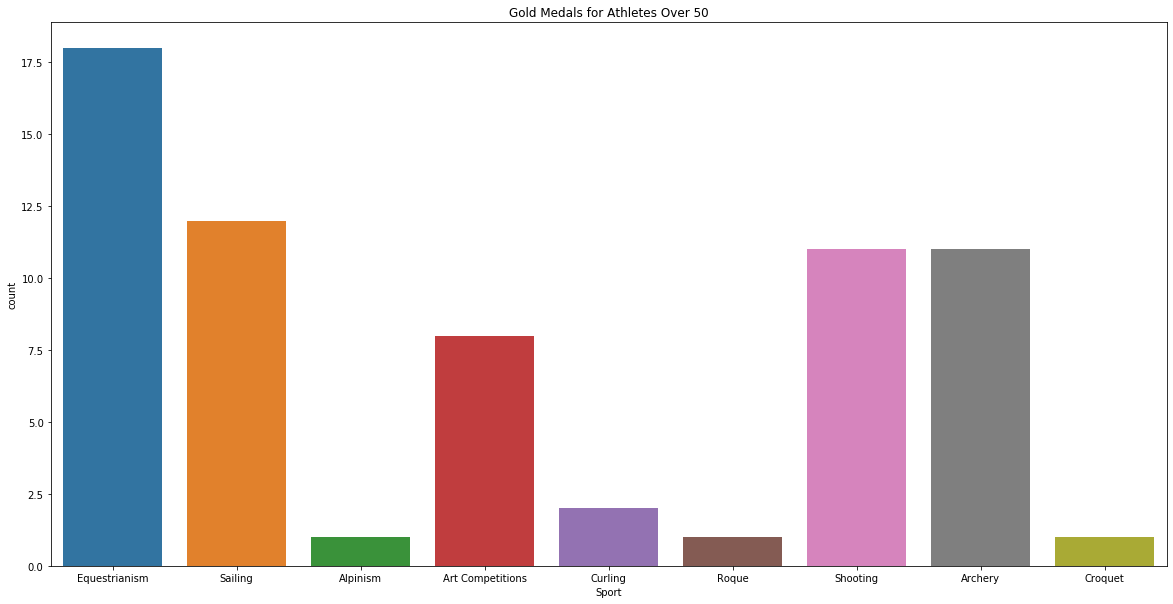

In [15]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

There we have it, it seems the elderly sportsmen winning gold medals are good horsemen, sailors, shooters & archers.

Let's see how well women did in the Olympics

In [16]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [17]:
womenInOlympics.head(10)

ID                                Name Sex   Age  Height  Weight  \
26    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
27    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
32   13                  Minna Maarit Aalto   F  30.0   159.0    55.5   
33   13                  Minna Maarit Aalto   F  34.0   159.0    55.5   
79   21           Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
80   22                       Andreea Aanei   F  22.0   170.0   125.0   
91   29                Willemien Aardenburg   F  22.0     NaN     NaN   
105  37                  Ann Kristin Aarnes   F  23.0   182.0    64.0   
135  49                        Moonika Aava   F  24.0   168.0    65.0   
136  49                        Moonika Aava   F  28.0   168.0    65.0   

            Team  NOC        Games  Year  Season            City  \
26   Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
27   Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
32       Finland  FIN  1996 Summer  1996  Summer         Atlanta   
33       Finland  FIN  2000 Summer  2000  Summer          Sydney   
79        Norway  NOR  2008 Summer  2008  Summer         Beijing   
80       Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro   
91   Netherlands  NED  1988 Summer  1988  Summer           Seoul   
105       Norway  NOR  1996 Summer  1996  Summer         Atlanta   
135      Estonia  EST  2004 Summer  2004  Summer          Athina   
136      Estonia  EST  2008 Summer  2008  Summer         Beijing   

             Sport                                    Event   Medal  \
26       Athletics             Athletics Women's 100 metres     NaN   
27       Athletics   Athletics Women's 4 x 100 metres Relay     NaN   
32         Sailing               Sailing Women's Windsurfer     NaN   
33         Sailing               Sailing Women's Windsurfer     NaN   
79        Handball                Handball Women's Handball    Gold   
80   Weightlifting  Weightlifting Women's Super-Heavyweight     NaN   
91          Hockey                    Hockey Women's Hockey  Bronze   
105       Football                Football Women's Football  Bronze   
135      Athletics          Athletics Women's Javelin Throw     NaN   
136      Athletics          Athletics Women's Javelin Throw     NaN   

          region notes  
26   Netherlands   NaN  
27   Netherlands   NaN  
32       Finland   NaN  
33       Finland   NaN  
79        Norway   NaN  
80       Romania   NaN  
91   Netherlands   NaN  
105       Norway   NaN  
135      Estonia   NaN  
136      Estonia   NaN

Text(0.5, 1.0, 'Women medals per edition of the Games')

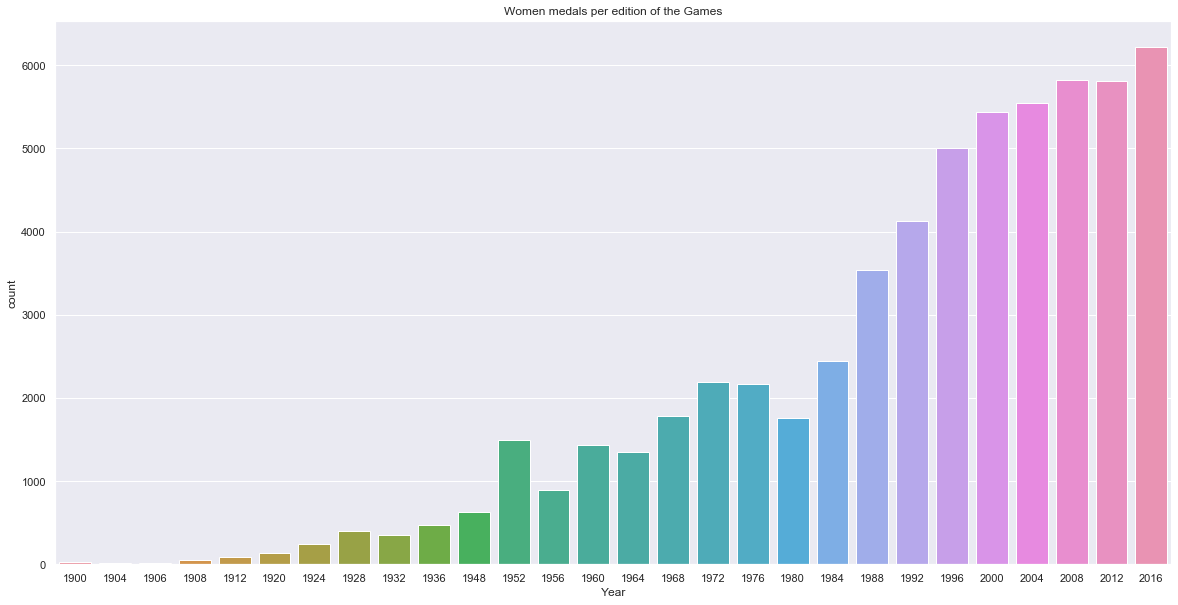

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

So as we get closer to th end of the 20th Century, the count of women medals increases, right up to this decade.
Note though that we will have more medals for the same athlete. 

Let's now look at the top 5 gold medal countries:

In [19]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

index  Medal
0      USA   2627
1   Russia   1599
2  Germany   1293
3       UK    657
4    Italy    567

Wow! The USA appears to be dominating here.Let's visualise

Text(0.5, 1, 'Medals per Country')

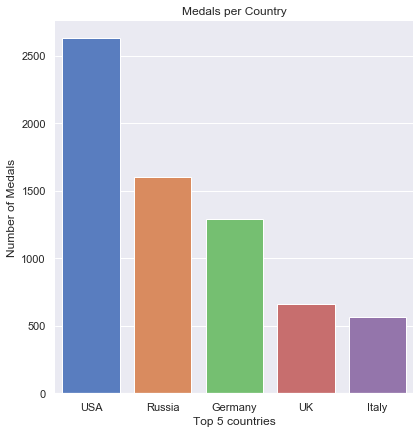

In [20]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

Let's see what sporting events the Americans won in

In [21]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [22]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

index  Medal
0                       Basketball Men's Basketball    186
1     Swimming Men's 4 x 200 metres Freestyle Relay    111
2        Swimming Men's 4 x 100 metres Medley Relay    108
3                         Rowing Men's Coxed Eights    107
4                     Basketball Women's Basketball     95
5              Athletics Men's 4 x 400 metres Relay     81
6      Swimming Women's 4 x 100 metres Medley Relay     79
7   Swimming Women's 4 x 100 metres Freestyle Relay     78
8                         Football Women's Football     66
9              Athletics Men's 4 x 100 metres Relay     63
10    Swimming Men's 4 x 100 metres Freestyle Relay     58
11           Athletics Women's 4 x 100 metres Relay     50
12                        Softball Women's Softball     45
13           Athletics Women's 4 x 400 metres Relay     38
14                      Rowing Women's Coxed Eights     36
15                                Rugby Men's Rugby     36
16                      Volleyball Men's Volleyball     36
17                      Ice Hockey Men's Ice Hockey     36
18  Swimming Women's 4 x 200 metres Freestyle Relay     33
19                    Water Polo Women's Water Polo     25

Well, It's not surprising that Basketball is the Top sport.
Basketball is a major sport in the U.S.A.
There are many professional players in the NBA.



We will now create two dataframes dividing the population of our dataset using Sex and Season
Variation of male/female athletes over time (Summer Games) 

In [23]:

MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]



Text(0.5, 1.0, 'Variation of Male Athletes over time')

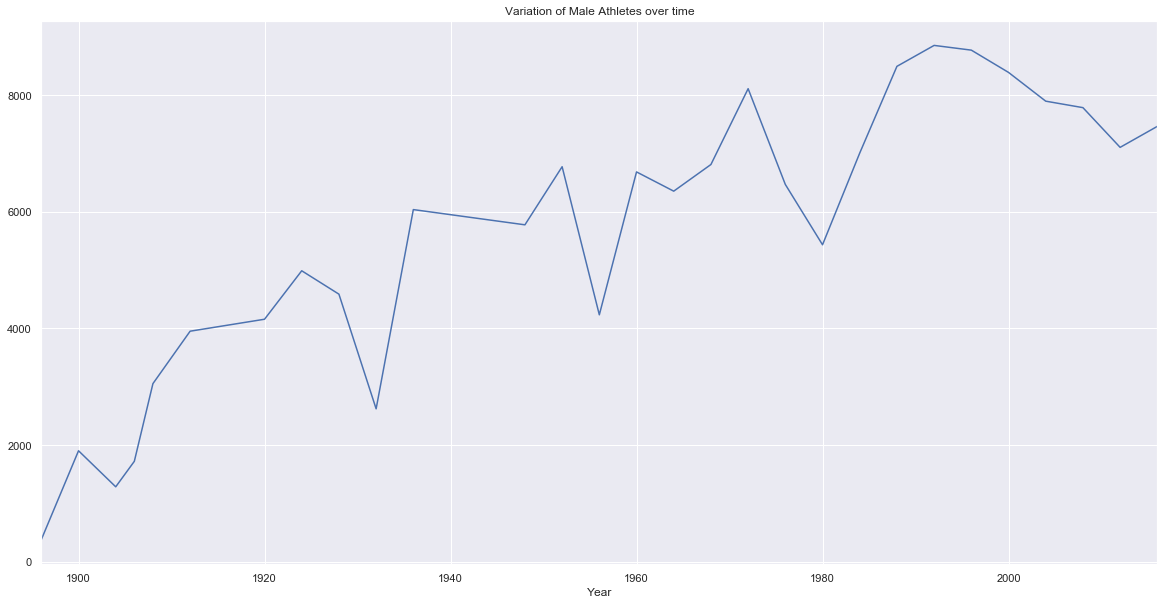

In [24]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

There is ultimately a decrease in population that is very erratic over time,only in this decade is it rising.
Le's see how the women do

Text(0.5, 1.0, 'Variation of Female Athletes over time')

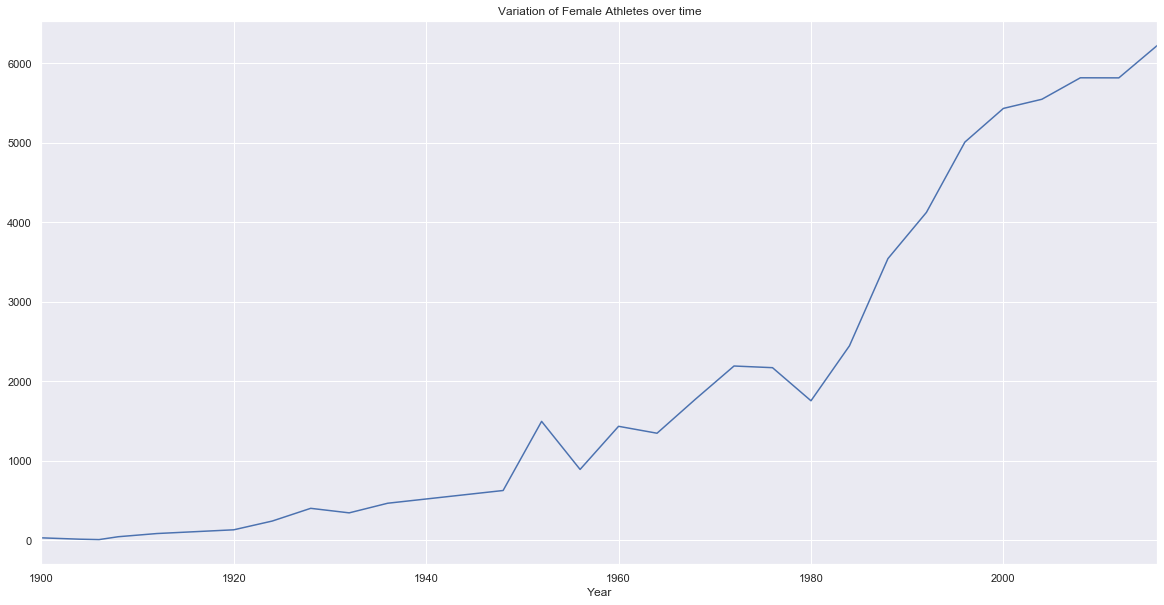

In [25]:


part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')



Wow! Over Time the population rate is almost exponential. 

Variation of age along time . Le's use Boxplots to visualise this.

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

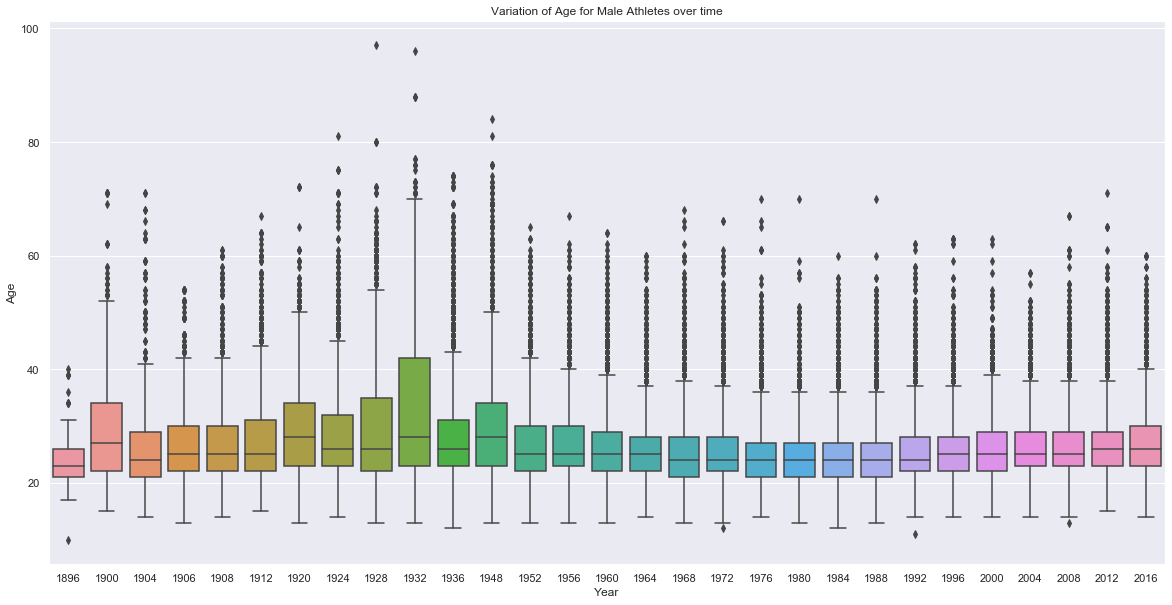

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')


Something seems odd about the age of some athletes in the games between the 1924 and the 1948: let's check all the people with age greater than 80.


In [27]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

ID                        Name Sex   Age  Height  Weight  \
9371      5146       George Denholm Armour   M  84.0     NaN     NaN   
60861    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
60862    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
60863    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
98118    49663               Winslow Homer   M  96.0     NaN     NaN   
154855   77710        Robert Tait McKenzie   M  81.0     NaN     NaN   
236912  118789                Louis Tauzin   M  81.0     NaN     NaN   
257054  128719      John Quincy Adams Ward   M  97.0     NaN     NaN   

                 Team  NOC        Games  Year  Season         City  \
9371    Great Britain  GBR  1948 Summer  1948  Summer       London   
60861   United States  USA  1932 Summer  1932  Summer  Los Angeles   
60862   United States  USA  1932 Summer  1932  Summer  Los Angeles   
60863   United States  USA  1932 Summer  1932  Summer  Los Angeles   
98118   United States  USA  1932 Summer  1932  Summer  Los Angeles   
154855         Canada  CAN  1948 Summer  1948  Summer       London   
236912         France  FRA  1924 Summer  1924  Summer        Paris   
257054  United States  USA  1928 Summer  1928  Summer    Amsterdam   

                   Sport                                              Event  \
9371    Art Competitions     Art Competitions Mixed Painting, Unknown Event   
60861   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
60862   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
60863   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
98118   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
154855  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
236912  Art Competitions                 Art Competitions Mixed Sculpturing   
257054  Art Competitions        Art Competitions Mixed Sculpturing, Statues   

       Medal  region notes  
9371     NaN      UK   NaN  
60861    NaN     USA   NaN  
60862    NaN     USA   NaN  
60863    NaN     USA   NaN  
98118    NaN     USA   NaN  
154855   NaN  Canada   NaN  
236912   NaN  France   NaN  
257054   NaN     USA   NaN

So Art Competition is a sport in the Olympic Games!

So this is the end of the presentation for now.
Maybe we will improve on it with more EDA, with the next version.